# PROJECT 02 : SHARK ATTACKS
-----

### BRIEF : data analysis of global shark attacks for a business idea
You will initially examine the Shark Attack dataset, understanding its structure and formulating a hypothesis or several hypotheses about the data. 
 We hypothesize that shark attacks are more common in certain locations and peak during specific months.
We define a Business Case, such as 

* “As a company that sells medical products, I want to identify destinations with high shark attack rates.”
* “As a company providing supply transportation services, I want to know when and where shark attacks peak to plan the safe transport of medical supplies to hospitals.”

 Throughout the project, we will use Python and the pandas library to apply at least five data cleaning techniques to handle missing values, duplicates, and formatting inconsistencies. After cleaning, we will perform basic exploratory data analysis to validate our hypotheses and extract insights. 

#### 📝 BUSINESS IDEA — 3 Bullet Points

* Problem to Solve: Coastal hospitals and emergency response teams are not always prepared with the right medical supplies during periods of high shark-attack frequency. This business solves the problem by predicting when and where attacks are most likely, so medical supplies can be stocked in advance.

* Business Concept: Use historical shark attack data to create global heatmaps and seasonal risk forecasts. Then provide pharmaceutical products (painkillers, antibiotics, blood bags, emergency kits) and transportation support to hospitals and ambulances near high-risk beaches.

* Data Used to Profit: The business will analyze Country, Date/Month, Gender, Age, Fatality, and Type of Injury to identify high-risk locations, peak attack months, and most common injury types. This allows optimized supply production, targeted sales, and efficient delivery to the areas that need it most.



## 🌀COLUMNS TO CLEAN : 
-----

**- COUNTRY (global comparison between countries to invest in more)** @Blanca

    * we just take the country column and make sure every country name is accurately named
    * We are gonna check the column of COUNTRY and make sure every country name is correct
    * We remove NULL COUNTRY data rows that dont have any country
    * We need to make sure that the name of COUNTRY  is capitalized and written the same way for example :
        United States of Amercia == USA == US
        it has to have the same name and consistent!

**- DATE ( MONTH + YEAR )** @Blanca

    * split the date into day - month columns and only use month column
    * interpret months which have shark attacks happen the most

**- GENDER ( F or M )** @Cecilia

    * We check unique values and make it so it is only two values F or M and deleted all rows that have other values
    * we noticed mostly M get attacked
    * percentages Male to Female victims
    * We remove NULL DATE data rows that dont have a date or that the date doesnt include a month and a year
    * We are gonna check the column of DATE and seperate it into three columns DAY + MONTH + YEAR
    * We verify that the new YEAR column matches with the old YEAR column and keep the ones that match
        * NEW YEAR COLUMN is the one split from the DATE column
        * OLD YEAR COLUMN is the one already existing in the original sheet
    * Once we finish comparing the new YEAR column vs old YEAR column and we find them not matching on some data rows. we remove the none matching ones so we keep clean data of accurate years
    * We remove the DAY and OLD YEAR columns
    * We are gonna keep the MONTH and matching YEAR

**- AGE (victims age ranges)** @Cecilia @Blanca @Samia

    * Insight: majority of victims survive! 
    * To keep in mind complications depending on age when getting treated we chose to focus on :
        * frequency of victims based on different age groups
        * we split the age groups into four categories (minors under 18 / young adults 18-30 / adults 30-40 / elders 40+) 
        * insight: majority of victims are young adults (26-28 years old)
        * insight: majority of victims are male 

**- INJURY TYPE** @Samia

    * clean the type of injury by severity
    * seperate the injury type into different severity
    * seperate the injury type into different body parts
    * treatment depends on type of injury and thus the supplies as well

**- INJURY SEVERITY** @Samia

    * clean the type of injury by severity
    * seperate the injury type into different severity
    * seperate the injury type into different body parts
    * treatment depends on type of injury and thus the supplies as well

**- FATALITY ( Y or N )** @Cecilia
    * depends on the column 'Type' of injury and if it includes death or high severity
    * mostly survived 
    * for the pharamaceutical logistics & transportation of injured people to the hospital
    * assumption we have a percentage of survivals highest and we use it to sell for the
    * We check unique values and make sure it is only two values Y or N and deleted all rows that have other values
    * assumption we have a high percentage of survivals and we use it to sell the idea to profit from selling products to hospitals


-------



### IMPORT UTILS and INIT from SRC

In [375]:
import sys, os
sys.path.append(os.path.abspath(".."))
from src import utils
from src import __init__

-----
### GENERAL

In [376]:
import pandas as pd

# Load the CSV
url = 'https://drive.google.com/uc?export=download&id=1ZRuzHohahE54BC7hKcA289tyuL9cp7-h'
df = pd.read_csv(url)
df.head(3)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,25 Aug 2023,2023.0,Unprovoked,AUSTRALIA,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF"
1,21 Aug-2023,2023.0,Questionable,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,20/30,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023"
2,07-Jun-2023,2023.0,Unprovoked,BAHAMAS,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF"


In [377]:

# Option 1: Display the entire DataFrame (all rows and columns)
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns

#the full table
#print(df)  

In [378]:
df.info()
# change type of each serie
# year into int or split it from Date
# Age into int


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       561 non-null    object 
 1   Year       560 non-null    float64
 2   Type       557 non-null    object 
 3   Country    556 non-null    object 
 4   State      508 non-null    object 
 5   Location   503 non-null    object 
 6   Activity   433 non-null    object 
 7   Name       502 non-null    object 
 8   Sex        480 non-null    object 
 9   Age        238 non-null    object 
 10  Injury     553 non-null    object 
 11  Fatal Y/N  0 non-null      float64
 12  Time       157 non-null    object 
 13  Species    526 non-null    object 
 14  Source     556 non-null    object 
dtypes: float64(2), object(13)
memory usage: 65.9+ KB


In [379]:
print("\nData Frame SHAPE", df.shape)

print("\nData Columns")
df.columns


Data Frame SHAPE (561, 15)

Data Columns


Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

-----
### 'Country' CLEANING

In [380]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [381]:
df['Country']

0                       AUSTRALIA
1                         BAHAMAS
2                         BAHAMAS
3                      SEYCHELLES
4                       ARGENTINA
5                      COSTA RICA
6                          BRAZIL
7                       AUSTRALIA
8                           EGYPT
9                       AUSTRALIA
10                      AUSTRALIA
11                      AUSTRALIA
12               FRENCH POLYNESIA
13                      AUSTRALIA
14                            USA
15                        BAHAMAS
16                            USA
17                       COLOMBIA
18                         BRAZIL
19                   SOUTH AFRICA
20                            USA
21                   SOUTH AFRICA
22                          SPAIN
23                            USA
24                            USA
25                        COMOROS
26                            USA
27                            USA
28                            USA
29            

In [382]:
df['Country'].nunique()
df['Country'].unique()

array(['AUSTRALIA', 'BAHAMAS', 'SEYCHELLES', 'ARGENTINA', 'COSTA RICA',
       'BRAZIL', 'EGYPT', 'FRENCH POLYNESIA', 'USA', 'COLOMBIA',
       'SOUTH AFRICA', 'SPAIN', 'COMOROS', 'MEXICO', 'CAPE VERDE',
       'CAYMAN ISLANDS', 'ITALY', nan, 'JAMAICA', 'TRINIDAD & TOBAGO',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'ANTIGUA',
       'UNITED ARAB EMIRATES (UAE)', 'GUAM', 'NEVIS', 'JAPAN',
       'NEW ZEALAND', 'BRITISH VIRGIN ISLANDS', 'SENEGAL', 'BELIZE',
       'Seychelles', 'LIBERIA', 'HONDURAS', 'SRI LANKA', 'INDONESIA',
       'NEW CALEDONIA', 'MADAGASCAR', 'MALAYSIA', 'TONGA', 'BERMUDA',
       'MONTENEGRO', 'SOMALIA', 'GREECE', 'MOZAMBIQUE',
       'PAPUA NEW GUINEA', 'TANZANIA', 'PANAMA', 'PHILIPPINES',
       'ATLANTIC OCEAN', 'JOHNSTON ISLAND', 'MARSHALL ISLANDS',
       'CARIBBEAN SEA', 'TURKEY', 'CUBA', 'GUATEMALA',
       'NORTH ATLANTIC OCEAN', 'NORTH PACIFIC OCEAN', 'PACIFIC OCEAN',
       'INDIAN OCEAN', 'UNITED KINGDOM', 'ISRAEL', 'ITALY / CROATIA',
       'INDIA', 'H

In [383]:
import pandas as pd

# Assume df is already loaded
# COUNTRY CLEANING
df = df.dropna(subset=["Country"])
df["Country"] = df["Country"].str.strip().str.title()

country_replacements = {
    "United States Of America": "USA",
    "Usa": "USA",
    "Us": "USA",
    "U.s.": "USA",
    "United Kingdom": "UK",
    "England": "UK",
    "Uk": "UK",
    "Brasil": "Brazil",
    "México": "Mexico",
    "United Arab Emirates (Uae)": "UAE",
    "Turkey": "Türkiye"
}

df["Country"] = df["Country"].replace(country_replacements)
df = df[df["Country"] != "Italy / Croatia"]

# Show stats about the Country column
print(df["Country"].describe())

# Save 'Country' CLEANED to CSV
df.to_csv("../data/interim/1_interim_country.csv", index=False)
print("STEP 1 : 'Country' Data cleaned and CSV saved successfully!")


count     555
unique     75
top       USA
freq      191
Name: Country, dtype: object
STEP 1 : 'Country' Data cleaned and CSV saved successfully!


In [384]:
# Load the CSV to df_country
url = "../data/interim/1_interim_country.csv"
df_country = pd.read_csv(url)
df_country['Country'].unique()

array(['Australia', 'Bahamas', 'Seychelles', 'Argentina', 'Costa Rica',
       'Brazil', 'Egypt', 'French Polynesia', 'USA', 'Colombia',
       'South Africa', 'Spain', 'Comoros', 'Mexico', 'Cape Verde',
       'Cayman Islands', 'Italy', 'Jamaica', 'Trinidad & Tobago',
       'Canada', 'Croatia', 'Saudi Arabia', 'Antigua', 'UAE', 'Guam',
       'Nevis', 'Japan', 'New Zealand', 'British Virgin Islands',
       'Senegal', 'Belize', 'Liberia', 'Honduras', 'Sri Lanka',
       'Indonesia', 'New Caledonia', 'Madagascar', 'Malaysia', 'Tonga',
       'Bermuda', 'Montenegro', 'Somalia', 'Greece', 'Mozambique',
       'Papua New Guinea', 'Tanzania', 'Panama', 'Philippines',
       'Atlantic Ocean', 'Johnston Island', 'Marshall Islands',
       'Caribbean Sea', 'Türkiye', 'Cuba', 'Guatemala',
       'North Atlantic Ocean', 'North Pacific Ocean', 'Pacific Ocean',
       'Indian Ocean', 'UK', 'Israel', 'India', 'Haiti', 'Yemen', 'Crete',
       'France', 'Syria', 'Azores', 'Fiji', 'Guyana', 'China'

In [385]:
# verify the changes
df['Country'].unique()

array(['Australia', 'Bahamas', 'Seychelles', 'Argentina', 'Costa Rica',
       'Brazil', 'Egypt', 'French Polynesia', 'USA', 'Colombia',
       'South Africa', 'Spain', 'Comoros', 'Mexico', 'Cape Verde',
       'Cayman Islands', 'Italy', 'Jamaica', 'Trinidad & Tobago',
       'Canada', 'Croatia', 'Saudi Arabia', 'Antigua', 'UAE', 'Guam',
       'Nevis', 'Japan', 'New Zealand', 'British Virgin Islands',
       'Senegal', 'Belize', 'Liberia', 'Honduras', 'Sri Lanka',
       'Indonesia', 'New Caledonia', 'Madagascar', 'Malaysia', 'Tonga',
       'Bermuda', 'Montenegro', 'Somalia', 'Greece', 'Mozambique',
       'Papua New Guinea', 'Tanzania', 'Panama', 'Philippines',
       'Atlantic Ocean', 'Johnston Island', 'Marshall Islands',
       'Caribbean Sea', 'Türkiye', 'Cuba', 'Guatemala',
       'North Atlantic Ocean', 'North Pacific Ocean', 'Pacific Ocean',
       'Indian Ocean', 'UK', 'Israel', 'India', 'Haiti', 'Yemen', 'Crete',
       'France', 'Syria', 'Azores', 'Fiji', 'Guyana', 'China'

In [386]:
top_countries = df['Country'].value_counts().head(100)
print(top_countries)
# PIE CHART FOR COUNTRIES WITH HIGHEST SHARK ATTACKS

# USA , Australia, South Africa got the highest frequency of shark attacks

Country
USA                       191
Australia                 120
South Africa               64
Italy                      14
New Zealand                12
Mexico                     11
Spain                      10
Brazil                      9
Bahamas                     8
Croatia                     8
Japan                       6
Greece                      5
Mozambique                  4
Egypt                       4
Cuba                        4
Philippines                 4
French Polynesia            3
Jamaica                     3
Bermuda                     3
Costa Rica                  3
UK                          3
Papua New Guinea            2
Atlantic Ocean              2
Indian Ocean                2
Sri Lanka                   2
Senegal                     2
Türkiye                     2
France                      2
Marshall Islands            2
Seychelles                  2
Cape Verde                  2
Antigua                     2
Cayman Islands              2
No

In [387]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [388]:
# we could try analyse which state in the USA has the most shark attacks?

In [389]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,25 Aug 2023,2023.0,Unprovoked,Australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF"
1,21 Aug-2023,2023.0,Questionable,Bahamas,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,20/30,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023"
2,07-Jun-2023,2023.0,Unprovoked,Bahamas,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF"
3,02-Mar-2023,2023.0,Unprovoked,Seychelles,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023"
4,18-Feb-2023,2023.0,Questionable,Argentina,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023"


In [390]:
# dropping the activity


-----
### 'Sex' CLEANING

In [391]:
# Load the updated CSV
url = "../data/interim/1_interim_country.csv"
df = pd.read_csv(url)
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [392]:
df['Sex']

0        M
1        M
2        F
3        M
4        M
5        F
6        M
7        M
8        M
9      NaN
10       F
11     NaN
12       F
13       F
14     NaN
15       M
16       F
17       M
18       M
19       M
20       M
21       M
22       F
23       M
24       F
25     NaN
26       M
27       F
28       F
29       M
30       M
31       M
32       M
33       M
34       M
35     NaN
36       M
37       M
38       M
39       M
40       M
41     NaN
42       M
43       M
44       F
45       M
46       M
47       M
48       M
49       F
50       M
51       M
52       F
53       M
54       M
55       F
56       M
57     NaN
58       M
59     NaN
60       M
61       M
62       M
63       F
64       M
65       F
66       M
67       M
68       M
69       M
70       M
71       M
72       M
73       M
74       M
75       M
76       F
77       F
78     NaN
79       M
80       M
81       M
82       M
83     NaN
84       M
85       M
86       M
87       M
88       M
89       F
90       F

In [393]:
# NaN , F, M
df['Sex'].value_counts(dropna=False)

Sex
M      411
NaN     80
F       64
Name: count, dtype: int64

In [394]:

df['Sex'] = df['Sex'].replace({
    'm' : 'M', 
    'f' : 'F', 
    'Male' : 'M', 
    'Female' : 'F'})

df['Sex'] = df['Sex'].str.upper()

In [395]:

df.dropna (subset = ['Sex'], inplace= True)
df['Sex'].value_counts(dropna=False)

Sex
M    411
F     64
Name: count, dtype: int64

In [396]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [397]:
df.shape

(475, 15)

In [398]:
df['Sex'].describe()
# Male is the highest in frequency with shark attacks

count     475
unique      2
top         M
freq      411
Name: Sex, dtype: object

In [399]:
# Save 'Sex' CLEANED to CSV
df.to_csv("../data/interim/2_interim_sex.csv", index=False)
print("STEP 2 : 'Sex' Data cleaned successfully!")

STEP 2 : 'Sex' Data cleaned successfully!


In [400]:
 df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,25 Aug 2023,2023.0,Unprovoked,Australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF"
1,21 Aug-2023,2023.0,Questionable,Bahamas,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,20/30,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023"
2,07-Jun-2023,2023.0,Unprovoked,Bahamas,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF"
3,02-Mar-2023,2023.0,Unprovoked,Seychelles,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023"
4,18-Feb-2023,2023.0,Questionable,Argentina,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023"


-----
### 'Age' CLEANING

In [401]:
# Load the updated CSV
url = "../data/interim/2_interim_sex.csv"
df = pd.read_csv(url)
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [402]:
df['Age'].info()
#238 non-null object

<class 'pandas.core.series.Series'>
RangeIndex: 475 entries, 0 to 474
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
233 non-null    object
dtypes: object(1)
memory usage: 3.8+ KB


In [403]:
df['Age'].unique()

array(['44', '20/30', '73', '6', '32', '50', '11', '26', nan, '35', '62',
       '34', '31', '33', '25', '10', '8', '18', '68', '20', '19', '27',
       '60', 'Teen', '65', '9', '40', '39', '43', '23', '38', '63', '47',
       '48', '42', '24', '12', '16', '14', '7', '49', '17', '52', '53',
       '45', '36', '54', '51', '22', '28', '56', '8 or 10', '75',
       '23 & 20', '37', '29', '21', '15', '30', '16 to 18', '67', '77',
       'mid-20s', 'Ca. 33', '? & 19', '46', '37, 67, 35, 27,  ? & 27',
       '21, 34,24 & 35', '34 & 19', '13', '5', '1'], dtype=object)

In [404]:
df['Age'].nunique()

71

In [405]:
import pandas as pd
import numpy as np
import re

# DATA .csv
df = pd.read_csv(url)
# def Function : clean_age(value=age)
def clean_age(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()

    # Remove useless text
    value = value.replace("years", "").replace("year", "").replace("ca.", "").replace("about", "").strip()

    # Words meaning no age
    if value in ["n/a", "na", "none", "?", "", "unknown"]:
        return np.nan

    # Teen keyword (approx.)
    if "teen" in value:
        return 15

    # mid-20s → 25
    if "mid" in value and "20" in value:
        return 25

    # Extract numbers
    nums = re.findall(r"\d+", value)

    # Single number
    if len(nums) == 1:
        return int(nums[0])
    
    # Multiple numbers -> average them (20/30, 23 & 20, 16 to 18)
    if len(nums) >= 2:
        nums = [int(n) for n in nums]
        return sum(nums) / len(nums)

    return np.nan

# Apply cleaner
df['Age_clean'] = df['Age'].apply(clean_age)

# Convert to numeric
df['Age_clean'] = pd.to_numeric(df['Age_clean'], errors='coerce')

# Fill missing with median
median_age = df['Age_clean'].median()
df['Age_clean'].fillna(median_age, inplace=True)

# Convert to integer (no floats)
df['Age_clean'] = df['Age_clean'].round().astype(int)


# Show result
print(df[['Age', 'Age_clean']].head(10))
print("\nMedian age used:", int(median_age))

# Copy Age_clean into Age
df['Age'] = df['Age_clean']

# Drop Age_clean column
df = df.drop(columns=['Age_clean'])


     Age  Age_clean
0     44         44
1  20/30         25
2     73         73
3      6          6
4     32         32
5     50         50
6     11         11
7     26         26
8    NaN         26
9    NaN         26

Median age used: 26


C:\Users\sboub\AppData\Local\Temp\ipykernel_17336\3124323.py:51: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [406]:
# Check result
print("\nFrequency of each",df["Age"].value_counts())


Frequency of each Age
26    247
17     15
20      9
43      8
22      7
24      7
21      7
32      7
25      7
19      7
18      7
11      6
23      6
31      6
27      6
9       5
40      5
36      5
10      5
28      5
35      5
14      5
39      4
49      4
44      4
45      4
52      4
12      4
53      3
37      3
7       3
29      3
30      3
47      3
42      3
15      3
50      3
33      3
34      3
68      2
8       2
13      2
51      2
63      2
16      2
38      2
62      2
48      2
6       2
65      1
67      1
5       1
46      1
77      1
75      1
73      1
56      1
54      1
60      1
1       1
Name: count, dtype: int64


In [407]:
df['Age'].describe().round().astype(int)

count    475
mean      28
std       11
min        1
25%       26
50%       26
75%       26
max       77
Name: Age, dtype: int64

In [408]:
percentiles = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

print("Age Percentile Statistics:")
print(f"Min:   {int(percentiles['min'])}")
print(f"25%:   {int(percentiles['25%'])}")
print(f"50% (Median): {int(percentiles['50%'])}")
print(f"75%:   {int(percentiles['75%'])}")
print(f"Max:   {int(percentiles['max'])}")

# the majority were people up to 26 years old

Age Percentile Statistics:
Min:   1
25%:   26
50% (Median): 26
75%:   26
Max:   77


In [409]:
# Save 'Age' CLEANED to CSV
df.to_csv("../data/interim/3_interim_age.csv", index=False)
print("STEP 3 : 'Age' Data cleaned successfully!")

STEP 3 : 'Age' Data cleaned successfully!


In [410]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,25 Aug 2023,2023.0,Unprovoked,Australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF"
1,21 Aug-2023,2023.0,Questionable,Bahamas,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023"
2,07-Jun-2023,2023.0,Unprovoked,Bahamas,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF"
3,02-Mar-2023,2023.0,Unprovoked,Seychelles,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023"
4,18-Feb-2023,2023.0,Questionable,Argentina,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023"


-----
## 'Type' Injury CLEANING

In [411]:
# Load the updated CSV
url = "../data/interim/3_interim_age.csv"
df = pd.read_csv(url)
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [412]:
df['Fatal Y/N'].unique()
# EMPTY

array([nan])

In [413]:
import pandas as pd
import numpy as np

def classify_injury(injury, fatal):
    if pd.isna(injury):
        injury = ""
    injury = injury.lower()
    fatal = str(fatal).strip().upper()

    # HOAX / FALSE
    if "hoax" in injury or "false" in injury:
        return "Hoax / False report"

    # NOT A SHARK
    if any(x in injury for x in ["not a shark", "stingray", "barracuda", "propeller", "fish"]):
        return "Not a shark"

    # NO INJURY
    if "no injury" in injury or "no injuries" in injury:
        return "No injury"

    # PROVOKED
    if "provoked" in injury:
        return "Provoked incident"

    # MISSING
    if any(x in injury for x in ["missing", "disappeared", "body not recovered"]):
        return "Missing / Unknown"

    # FATAL CASES
    if fatal == "Y":
        # drowned then bitten after death
        if "post-mortem" in injury or ("drown" in injury and "post" in injury):
            return "Fatal | Drowned, shark scavenged"
        if "unconfirmed" in injury or "probable" in injury:
            return "Fatal | Unconfirmed shark involvement"
        return "Fatal | Shark confirmed"

    # NON-FATAL CASES
    if fatal == "N":
        if any(x in injury for x in ["bitten", "lacerat", "puncture", "wound", "abrasion"]):
            return "Non-fatal | Confirmed shark bite"
        # Text but no bite
        return "Non-fatal | Other"

    # Unknown
    return "Other/Unknown"

# Apply to dataframe
df["Type"] = df.apply(lambda row: classify_injury(row["Injury"], row["Fatal Y/N"]), axis=1)


# Check RESULTS--------------------------------------------------------------------------------------------------------------

# Count number of records in each injury type
counts = df["Type"].value_counts()

# Calculate percentages
percentages = (counts / len(df)) * 100

# Create summary DataFrame
summary = pd.DataFrame({
    "Cases": counts,
    "Percentage": percentages.round(2)
})


# Save TYPE of INJURY CLEANED file
df.to_csv("../data/interim/4_interim_type_injury.csv", index=False)

# Print Injury type
print("Injury Type:")
for category in counts.index:
    print(f"{category}: {counts[category]} cases  ({percentages[category]:.2f}%)")

Injury Type:
Other/Unknown: 338 cases  (71.16%)
No injury: 74 cases  (15.58%)
Missing / Unknown: 34 cases  (7.16%)
Not a shark: 22 cases  (4.63%)
Provoked incident: 4 cases  (0.84%)
Hoax / False report: 3 cases  (0.63%)


In [414]:
# Save 'Type' CLEANED file
# Save cleaned and updated DataFrame to a new CSV
# we save the data after changes
df.to_csv("../data/interim/4_interim_type_injury.csv", index=False)
print("STEP 4 : 'Type' Data cleaned successfully!")

STEP 4 : 'Type' Data cleaned successfully!


In [415]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,25 Aug 2023,2023.0,Other/Unknown,Australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,NaN,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF"
1,21 Aug-2023,2023.0,Other/Unknown,Bahamas,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,NaN,Morning,NaN,"The Tribune, 8/21/2023"
2,07-Jun-2023,2023.0,Other/Unknown,Bahamas,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,NaN,13h00,Caribbean rreef shark,"J. Marchand, GSAF"
3,02-Mar-2023,2023.0,Other/Unknown,Seychelles,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,NaN,Afternoon,Lemon shark,"Midlibre, 3/18/2023"
4,18-Feb-2023,2023.0,Other/Unknown,Argentina,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,NaN,NaN,NaN,"El Pais, 2/27/2023"


-----
## INJURY SEVERITY EXTRA

In [416]:
# Load the updated CSV
url = "../data/interim/4_interim_type_injury.csv"
df = pd.read_csv(url)
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [417]:
df['Type'].describe().round()

count               475
unique                6
top       Other/Unknown
freq                338
Name: Type, dtype: object

In [418]:
import re

# Function to classify injury severity
def classify_severity(val):
    if pd.isna(val):
        val = ""
    val = val.lower()
    
    if re.search(r'fatal|death|died|deceased', val):
        return "Death"
    if re.search(r'amputation|severed|severely bitten', val):
        return "Severe injury"
    if re.search(r'bitten|bite|laceration|cuts|fracture', val):
        return "Minor injury"
    if re.search(r'no injury|not injured|unharmed', val):
        return "No injury"
    if re.search(r'possible drowning|unknown', val):
        return "Uncertain"
    
    return "Unknown"

# Apply to create Injury Severity column
df["Injury Severity"] = df["Injury"].apply(classify_severity)

In [419]:
# Save 'Injury Severity' CLEANED to CSV
df.to_csv("../data/interim/5_interim_injury_severity.csv", index=False)
print("STEP 5 : 'Injury Severity' Data cleaned successfully!")

STEP 5 : 'Injury Severity' Data cleaned successfully!


In [420]:
print(df['Type'].unique())

['Other/Unknown' 'Missing / Unknown' 'No injury' 'Not a shark'
 'Hoax / False report' 'Provoked incident']


In [421]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'Injury Severity'],
      dtype='object')

-----
## FATALITY CLEANING 

Fatality depends on injury severity because it used to be all NaN

In [422]:
# Load the updated CSV
url = "../data/interim/5_interim_injury_severity.csv"
df = pd.read_csv(url)
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'Injury Severity'],
      dtype='object')

In [423]:
# Now derive Fatal Y/N based on Injury Severity
def derive_fatal(severity):
    if severity == "Death":
        return "Y"
    elif severity in ["Severe injury", "Injury", "No injury", "Uncertain", "Other/Unknown"]:
        return "N"
    return "N"

df["Fatal Y/N"] = df["Injury Severity"].apply(derive_fatal)


# Save INJURY SEVERITY CLEANED file
df.to_csv("../data/interim/5_interim_injury_severity.csv", index=False)



# Check the first rows
print(df[["Injury", "Injury Severity", "Fatal Y/N"]].head(10))

                                              Injury Injury Severity Fatal Y/N
0                     Severe injuries to lower limbs         Unknown         N
1  Body found with shark bites. Possible drowning...           Death         Y
2                               Calf severely bitten   Severe injury         N
3                                   Left foot bitten    Minor injury         N
4                              Death by misadventure           Death         Y
5                Right forearm and left hand injured         Unknown         N
6                           Minor cuts to left thigh    Minor injury         N
7                                        Disappeared         Unknown         N
8           Laceration to arm caused by metal object    Minor injury         N
9                                                NaN         Unknown         N


In [424]:
# Save INJURY SEVERITY CLEANED file
df.to_csv("../data/interim/6_interim.fatality.csv", index=False)

df['Fatal Y/N'].describe()
# majority survive shark attacks !

count     475
unique      2
top         N
freq      378
Name: Fatal Y/N, dtype: object

In [425]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Injury Severity
0,25 Aug 2023,2023.0,Other/Unknown,Australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,N,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",Unknown
1,21 Aug-2023,2023.0,Other/Unknown,Bahamas,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,Y,Morning,NaN,"The Tribune, 8/21/2023",Death
2,07-Jun-2023,2023.0,Other/Unknown,Bahamas,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,N,13h00,Caribbean rreef shark,"J. Marchand, GSAF",Severe injury
3,02-Mar-2023,2023.0,Other/Unknown,Seychelles,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,N,Afternoon,Lemon shark,"Midlibre, 3/18/2023",Minor injury
4,18-Feb-2023,2023.0,Other/Unknown,Argentina,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,Y,NaN,NaN,"El Pais, 2/27/2023",Death


----------
## 'Date' CLEANING & seperate DD-MM-YYYY columns

In [426]:
# Load the updated CSV
url = "../data/interim/6_interim.fatality.csv"
df = pd.read_csv(url)
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'Injury Severity'],
      dtype='object')

In [427]:
import pandas as pd
import re

# DataFrame with the 'Date' column
df = pd.read_csv(url)

# Function to parse dates-------------------------------------------------------------------------------------------------------------------
def parse_date(date_str):
    date_str = str(date_str).strip()
    
    # Remove 'Reported ' prefix
    date_str = re.sub(r'^Reported\s+', '', date_str, flags=re.IGNORECASE)
    
    # Patterns to match
    patterns = [
        r'(?P<DD>\d{1,2})[- ](?P<MM>[A-Za-z]+)[- ](?P<YYYY>\d{4})',  # DD MMM YYYY
        r'(?P<MM>[A-Za-z]+)[- ](?P<YYYY>\d{4})',                      # MMM-YYYY
        r'(?P<YYYY>\d{4})',                                           # YYYY only
    ]
    
    for pat in patterns:
        match = re.match(pat, date_str)
        if match:
            return match.groupdict()
    
    return {'DD': None, 'MM': None, 'YYYY': None}
#--------------------------------------------------------------------------------------------------------------------------------------------
# Call Function to the column
parsed_dates = df['Date'].apply(parse_date).apply(pd.Series)

# Merge back to original DataFrame
df = pd.concat([df, parsed_dates], axis=1)

# drop the column 'Date' and add the new columns DD MM YYYY
df = df.drop(columns=['Date'])

#
df = df[df["MM"] != "Early"]
df = df[df["MM"] != "Circa"]
df = df[df["MM"] != "Late"]
df = df[df["MM"] != "Before"]

df.head()

,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Injury Severity,DD,MM,YYYY
0,2023.0,Other/Unknown,Australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,N,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",Unknown,25,Aug,2023
1,2023.0,Other/Unknown,Bahamas,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,Y,Morning,NaN,"The Tribune, 8/21/2023",Death,21,Aug,2023
2,2023.0,Other/Unknown,Bahamas,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,N,13h00,Caribbean rreef shark,"J. Marchand, GSAF",Severe injury,07,Jun,2023
3,2023.0,Other/Unknown,Seychelles,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,N,Afternoon,Lemon shark,"Midlibre, 3/18/2023",Minor injury,02,Mar,2023
4,2023.0,Other/Unknown,Argentina,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,Y,NaN,NaN,"El Pais, 2/27/2023",Death,18,Feb,2023


In [428]:
import pandas as pd
import numpy as np
import re
# Clean the MM from 'NaN' and 'None'
df = df[df["MM"].notna() & (df["MM"] != "")]

# Replace full month names with abbreviations
df["MM"] = df["MM"].replace({
    "November": "Nov",
    "April": "Apr"
})

df['MM'].unique()

array(['Aug', 'Jun', 'Mar', 'Feb', 'Nov', 'Oct', 'Sep', 'Jul', 'Apr',
       'May', 'Jan', 'Dec'], dtype=object)

In [429]:

import pandas as pd
import numpy as np
import re

# DATA .csv
df = pd.read_csv(url)
# Function to parse dates-------------------------------------------------------------------------------------------------------------------
def parse_date(date_str):
    date_str = str(date_str).strip()
    
    # Remove 'Reported ' prefix
    date_str = re.sub(r'^Reported\s+', '', date_str, flags=re.IGNORECASE)
    
    # Patterns to match
    patterns = [
        r'(?P<DD>\d{1,2})[- ](?P<MM>[A-Za-z]+)[- ](?P<YYYY>\d{4})',  # DD MMM YYYY
        r'(?P<MM>[A-Za-z]+)[- ](?P<YYYY>\d{4})',                      # MMM-YYYY
        r'(?P<YYYY>\d{4})',                                           # YYYY only
    ]
    
    for pat in patterns:
        match = re.match(pat, date_str)
        if match:
            return match.groupdict()
    
    return {'DD': None, 'MM': None, 'YYYY': None}
#--------------------------------------------------------------------------------------------------------------------------------------------
# Call Function to the column
parsed_dates = df['Date'].apply(parse_date).apply(pd.Series)

# Merge back to original DataFrame
df = pd.concat([df, parsed_dates], axis=1)

# drop the column 'Date' and add the new columns DD MM YYYY
df = df.drop(columns=['Date'])

#
df = df[df["MM"] != "Early"]
df = df[df["MM"] != "Circa"]
df = df[df["MM"] != "Late"]
df = df[df["MM"] != "Before"]



In [430]:

# Mapping month names to integers
month_map = {
    'Jan': 1, 'January': 1,
    'Feb': 2, 'February': 2,
    'Mar': 3, 'March': 3,
    'Apr': 4, 'April': 4,
    'May': 5,
    'Jun': 6, 'June': 6,
    'Jul': 7, 'July': 7,
    'Aug': 8, 'August': 8,
    'Sep': 9, 'Sept': 9, 'September': 9,
    'Oct': 10, 'October': 10,
    'Nov': 11, 'November': 11,
    'Dec': 12, 'December': 12
}

# Map MM column to integers; non-months become NaN
df['MM_clean'] = df['MM'].map(month_map)

# Drop non-month values
df_months_only = df.dropna(subset=['MM_clean']).copy()

# Convert to int
df_months_only['MM_clean'] = df_months_only['MM_clean'].astype(int)

# Compute percentages
mm_percent = df_months_only['MM_clean'].value_counts(normalize=True) * 100


# Compute counts from the cleaned DataFrame
mm_counts = df_months_only['MM_clean'].value_counts()

# Display results
print("Counts of months (MM_clean):")
print(mm_counts.sort_index())  # months in chronological order

mm_percent = df_months_only['MM_clean'].value_counts(normalize=True) * 100

# Round to 2 decimal places and add % sign
mm_percent_formatted = mm_percent.sort_index().map(lambda x: f"{x:.2f}%")

# Display
print("\nPercentage of each month (MM_clean):")
print(mm_percent_formatted)


Counts of months (MM_clean):
MM_clean
1     46
2     23
3     29
4     45
5     24
6     38
7     51
8     62
9     30
10    27
11    28
12    29
Name: count, dtype: int64

Percentage of each month (MM_clean):
MM_clean
1     10.65%
2      5.32%
3      6.71%
4     10.42%
5      5.56%
6      8.80%
7     11.81%
8     14.35%
9      6.94%
10     6.25%
11     6.48%
12     6.71%
Name: proportion, dtype: object


In [431]:
# frequency of shark attack in every month
df['MM'].value_counts()

MM
Aug         62
Jul         51
Jan         46
Apr         44
Jun         38
Sep         30
Mar         29
Dec         29
Nov         27
Oct         27
May         24
Feb         23
November     1
April        1
Name: count, dtype: int64

In [432]:
# Calculate percentage of shark attacks per month
percentages = df['MM'].value_counts(normalize=True) * 100

# Sort from high to low
percentages_sorted = percentages.sort_values(ascending=False)

# Format as 00.00%
percentages_formatted = percentages_sorted.map("{:.2f}%".format)

print(percentages_formatted)


MM
Aug         14.35%
Jul         11.81%
Jan         10.65%
Apr         10.19%
Jun          8.80%
Sep          6.94%
Mar          6.71%
Dec          6.71%
Nov          6.25%
Oct          6.25%
May          5.56%
Feb          5.32%
November     0.23%
April        0.23%
Name: proportion, dtype: object


In [433]:
# Drop MM_clean column
df = df.drop(columns=['MM_clean'])

# Drop Year column
df = df.drop(columns=['Year'])

In [434]:
# Save 'Date' CLEANED to CSV
df.to_csv("../data/interim/7_interim_date.csv", index=False)
print("STEP 7 : 'Date' cleaned successfully!")

STEP 7 : 'Date' cleaned successfully!


In [435]:
# Save DATE CLEANED file
# check for changes
df.head()

,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Injury Severity,DD,MM,YYYY
0,Other/Unknown,Australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,N,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",Unknown,25,Aug,2023
1,Other/Unknown,Bahamas,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,Y,Morning,NaN,"The Tribune, 8/21/2023",Death,21,Aug,2023
2,Other/Unknown,Bahamas,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,N,13h00,Caribbean rreef shark,"J. Marchand, GSAF",Severe injury,07,Jun,2023
3,Other/Unknown,Seychelles,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,N,Afternoon,Lemon shark,"Midlibre, 3/18/2023",Minor injury,02,Mar,2023
4,Other/Unknown,Argentina,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,Y,NaN,NaN,"El Pais, 2/27/2023",Death,18,Feb,2023


----
# FINAL CHANGES

In [436]:
df.head(5)

,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Injury Severity,DD,MM,YYYY
0,Other/Unknown,Australia,New South Wales,"Lighthouse Beach, Port Macquarie",Surfing,Toby Begg,M,44,Severe injuries to lower limbs,N,10h00,"White shark, 3.8-4.2m","B. Myatt, & M. Michaelson, GSAF",Unknown,25,Aug,2023
1,Other/Unknown,Bahamas,New Providence Isoad,"Saunders Beach, Nassau",NaN,male,M,25,Body found with shark bites. Possible drowning...,Y,Morning,NaN,"The Tribune, 8/21/2023",Death,21,Aug,2023
2,Other/Unknown,Bahamas,Freeport,Shark Junction,Scuba diving,Heidi Ernst,F,73,Calf severely bitten,N,13h00,Caribbean rreef shark,"J. Marchand, GSAF",Severe injury,07,Jun,2023
3,Other/Unknown,Seychelles,Praslin Island,NaN,Snorkeling,Arthur …,M,6,Left foot bitten,N,Afternoon,Lemon shark,"Midlibre, 3/18/2023",Minor injury,02,Mar,2023
4,Other/Unknown,Argentina,Patagonia,Chubut Province,NaN,Diego Barría,M,32,Death by misadventure,Y,NaN,NaN,"El Pais, 2/27/2023",Death,18,Feb,2023


In [437]:
# Drop columns we don't need:
df = df.drop(columns=['Activity'])
df = df.drop(columns=['Type'])
df = df.drop(columns=['Species '])
df = df.drop(columns=['Source'])
df = df.drop(columns=['Time'])
df = df.drop(columns=['Name'])
df = df.drop(columns=['State'])
df = df.drop(columns=['Location'])
df = df.drop(columns=['DD'])
df = df[df['MM'].notna() & (df['MM'] != "")]
df.head()

,Country,Sex,Age,Injury,Fatal Y/N,Injury Severity,MM,YYYY
0,Australia,M,44,Severe injuries to lower limbs,N,Unknown,Aug,2023
1,Bahamas,M,25,Body found with shark bites. Possible drowning...,Y,Death,Aug,2023
2,Bahamas,F,73,Calf severely bitten,N,Severe injury,Jun,2023
3,Seychelles,M,6,Left foot bitten,N,Minor injury,Mar,2023
4,Argentina,M,32,Death by misadventure,Y,Death,Feb,2023


In [438]:
# Save INTERIM DATAFRAM CLEANED to CSV
df.to_csv("../data/interim/8_interim_clean.csv", index=False)
print("STEP 8 : All Data cleaned successfully!")
df.head()

STEP 8 : All Data cleaned successfully!


,Country,Sex,Age,Injury,Fatal Y/N,Injury Severity,MM,YYYY
0,Australia,M,44,Severe injuries to lower limbs,N,Unknown,Aug,2023
1,Bahamas,M,25,Body found with shark bites. Possible drowning...,Y,Death,Aug,2023
2,Bahamas,F,73,Calf severely bitten,N,Severe injury,Jun,2023
3,Seychelles,M,6,Left foot bitten,N,Minor injury,Mar,2023
4,Argentina,M,32,Death by misadventure,Y,Death,Feb,2023


----
# CHARTS & INSIGHTS

In [439]:
df.columns

Index(['Country', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Injury Severity', 'MM',
       'YYYY'],
      dtype='object')

In [440]:
import plotly.io as pio
import plotly.express as px

# Use VS Code renderer for inline display
pio.renderers.default = 'vscode'  # or 'iframe'

# Prepare data
top_5 = df['Country'].value_counts().nlargest(5).reset_index()
top_5.columns = ['Country', 'Count']

# Create pie chart
fig = px.pie(
    top_5,
    names='Country',
    values='Count',
    title='Countries with High frequncy of shark attacks',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()


In [441]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Ensure inline display in VS Code
pio.renderers.default = 'vscode'  # or 'iframe'

# Check column names for typos/spaces
print(df.columns)  # Optional: just to see actual column names

# Use the correct column names for Age and Sex
age_col = [col for col in df.columns if 'age' in col.lower()][0]  # picks the first column containing 'age'
sex_col = [col for col in df.columns if 'sex' in col.lower()][0]   # picks the first column containing 'sex'

# Ensure 'Age' is numeric
df[age_col] = pd.to_numeric(df[age_col], errors='coerce')

# Drop rows where Age is NaN
df = df.dropna(subset=[age_col])

# Group by Sex and calculate average Age
sex_age = df.groupby(sex_col)[age_col].mean().reset_index()

# Create the bar chart
fig = px.bar(
    sex_age,
    x=sex_col,
    y=age_col,
    color=sex_col,
    title='Average Age by Sex',
    text=sex_age[age_col].round(1),
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Sex',
    yaxis_title='Average Age',
    template='plotly_white'
)

fig.show()


Index(['Country', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Injury Severity', 'MM',
       'YYYY'],
      dtype='object')


In [442]:
print(df.columns)
df.head(560)


# Clean Location data
# add extra data
## nearest_hospital_to_beach_location
## most_needed_product_for_injury_severity


Index(['Country', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Injury Severity', 'MM',
       'YYYY'],
      dtype='object')


,Country,Sex,Age,Injury,Fatal Y/N,Injury Severity,MM,YYYY
0,Australia,M,44,Severe injuries to lower limbs,N,Unknown,Aug,2023
1,Bahamas,M,25,Body found with shark bites. Possible drowning...,Y,Death,Aug,2023
2,Bahamas,F,73,Calf severely bitten,N,Severe injury,Jun,2023
3,Seychelles,M,6,Left foot bitten,N,Minor injury,Mar,2023
4,Argentina,M,32,Death by misadventure,Y,Death,Feb,2023
5,Costa Rica,F,50,Right forearm and left hand injured,N,Unknown,Feb,2022
6,Brazil,M,11,Minor cuts to left thigh,N,Minor injury,Nov,2021
7,Australia,M,26,Disappeared,N,Unknown,Oct,2021
8,Egypt,M,26,Laceration to arm caused by metal object,N,Minor injury,Sep,2021
9,Australia,F,26,NaN,N,Unknown,Jun,2020


In [443]:
import pandas as pd
import numpy as np

def classify_injury_type(desc):
    if pd.isna(desc) or desc.strip() == "":
        return "unknown"

    desc = desc.lower()

    # Death
    if any(word in desc for word in ["dead", "death", "fatal", "killed", "deceased"]):
        return "fatal injury"

    # No injury
    if any(word in desc for word in ["no injury", "uninjured", "not injured", "no injuries"]):
        return "no injury"

    # Severe injury
    if any(word in desc for word in [
        "fracture", "broken", "deep cut", "severe", "heavy bleeding",
        "head trauma", "hospitalized", "internal injury", "critical"
    ]):
        return "severe injury"

    # Minor injuries
    if any(word in desc for word in [
        "bruise", "bruising", "small cut", "scratch", "minor", "sprain",
        "superficial", "light injury"
    ]):
        return "minor injury"

    # Uncertain injury
    if any(word in desc for word in ["possible", "maybe injured", "unconfirmed"]):
        return "possible injury"

    # If nothing matched
    return "unknown"


def classify_injury_severity(desc):
    if pd.isna(desc) or desc.strip() == "":
        return "unknown"

    desc = desc.lower()

    # DEATH
    if any(word in desc for word in ["dead", "death", "fatal", "killed", "deceased"]):
        return "death"

    # NO INJURY
    if any(word in desc for word in ["no injury", "uninjured", "not injured", "no injuries"]):
        return "no injury"

    # SEVERE INJURY
    if any(word in desc for word in [
        "fracture", "broken", "deep cut", "severe", "heavy bleeding",
        "head trauma", "internal injury", "critical", "hospital"
    ]):
        return "severe injury"

    # MINOR INJURY
    if any(word in desc for word in [
        "bruise", "bruising", "scratch", "minor", "small cut", "sprain",
        "superficial"
    ]):
        return "minor injury"

    # UNCERTAIN
    if any(word in desc for word in ["possible", "maybe", "unconfirmed"]):
        return "uncertain"

    # UNKNOWN (no info)
    return "unknown"


# ---- APPLY TO YOUR DATAFRAME ----

# Example: df['injury_description'] contains your text
# Replace with the name of your column

df["injury_type"] = df["Injury"].apply(classify_injury_type)
df["injury_severity"] = df["Injury"].apply(classify_injury_severity)

df.head()


,Country,Sex,Age,Injury,Fatal Y/N,Injury Severity,MM,YYYY,injury_type,injury_severity
0,Australia,M,44,Severe injuries to lower limbs,N,Unknown,Aug,2023,severe injury,severe injury
1,Bahamas,M,25,Body found with shark bites. Possible drowning...,Y,Death,Aug,2023,fatal injury,death
2,Bahamas,F,73,Calf severely bitten,N,Severe injury,Jun,2023,severe injury,severe injury
3,Seychelles,M,6,Left foot bitten,N,Minor injury,Mar,2023,unknown,unknown
4,Argentina,M,32,Death by misadventure,Y,Death,Feb,2023,fatal injury,death


In [444]:
import plotly.express as px
import plotly.io as pio

# Show in VSCode browser
pio.renderers.default = 'vscode'

# Ensure columns are clean
df.columns = df.columns.str.strip()

# --------------------------------------------
# 1. INJURY SEVERITY GRAPH
# --------------------------------------------
if 'injury_severity' not in df.columns:
    raise KeyError("Column 'injury_severity' not found! Current columns: " + str(df.columns.tolist()))

severity_counts = df['injury_severity'].value_counts().reset_index()
severity_counts.columns = ['Injury Severity', 'Count']

fig1 = px.bar(
    severity_counts,
    x='Injury Severity',
    y='Count',
    title='Distribution of Injury Severity',
    color='Injury Severity',
    text='Count',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig1.update_traces(textposition='outside')
fig1.update_layout(
    xaxis_title='Injury Severity',
    yaxis_title='Number of Cases',
    template='plotly_white',
    showlegend=False
)

fig1.show()

# --------------------------------------------
# 2. INJURY TYPE GRAPH
# --------------------------------------------
if 'injury_type' not in df.columns:
    raise KeyError("Column 'injury_type' not found! Current columns: " + str(df.columns.tolist()))

type_counts = df['injury_type'].value_counts().reset_index()
type_counts.columns = ['Injury Type', 'Count']

fig2 = px.bar(
    type_counts,
    x='Injury Type',
    y='Count',
    title='Distribution of Injury Types',
    color='Injury Type',
    text='Count',
    color_discrete_sequence=px.colors.qualitative.Prism
)

fig2.update_traces(textposition='outside')
fig2.update_layout(
    xaxis_title='Injury Type',
    yaxis_title='Number of Cases',
    template='plotly_white',
    showlegend=False
)

fig2.show()


In [445]:
import plotly.express as px
import plotly.io as pio

# Show in VSCode browser
pio.renderers.default = 'vscode'

# Clean column names
df.columns = df.columns.str.strip()

# ============================================================
# 1. Distribution of injury_severity
# ============================================================

severity_counts = df['injury_severity'].value_counts().reset_index()
severity_counts.columns = ['injury_severity', 'count']

fig_severity = px.bar(
    severity_counts,
    x='injury_severity',
    y='count',
    title='Distribution of Injury Severity',
    color='injury_severity',
    text='count',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig_severity.update_traces(textposition='outside')
fig_severity.update_layout(
    xaxis_title='Injury Severity',
    yaxis_title='Number of Cases',
    template='plotly_white',
    showlegend=False
)

fig_severity.show()


# ============================================================
# 2. Distribution of injury_type
# ============================================================

type_counts = df['injury_type'].value_counts().reset_index()
type_counts.columns = ['injury_type', 'count']

fig_type = px.bar(
    type_counts,
    x='injury_type',
    y='count',
    title='Distribution of Injury Types',
    color='injury_type',
    text='count',
    color_discrete_sequence=px.colors.qualitative.Prism
)

fig_type.update_traces(textposition='outside')
fig_type.update_layout(
    xaxis_title='Injury Type',
    yaxis_title='Number of Cases',
    template='plotly_white',
    showlegend=False
)

fig_type.show()


In [446]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"

# ----------------------------------------------------------
# 1) INJURY TYPE CLASSIFIER (body-part based)
# ----------------------------------------------------------
def classify_injury_type(desc):
    if pd.isna(desc) or desc.strip() == "":
        return "unknown"

    desc = desc.lower()

    # Death → separate category
    if any(w in desc for w in ["dead", "death", "fatal", "killed"]):
        return "fatal injury"

    # Limb injuries
    if any(w in desc for w in [
        "arm", "leg", "hand", "foot", "wrist", "ankle", "shoulder",
        "elbow", "knee", "thigh", "shin"
    ]):
        return "limb injury"

    # Head / face injuries
    if any(w in desc for w in [
        "head", "face", "scalp", "eye", "ear", "jaw", "nose", "cheek"
    ]):
        return "head/face injury"

    # Torso injuries
    if any(w in desc for w in [
        "torso", "chest", "abdomen", "back", "rib", "stomach"
    ]):
        return "torso injury"

    # Multiple body parts
    if any(w in desc for w in ["multiple injuries", "several injuries", "various injuries"]):
        return "multiple injuries"

    # Superficial injuries (location unknown)
    if any(w in desc for w in ["bruise", "scratch", "small cut", "superficial"]):
        return "superficial injury"

    # Severe but location unclear
    if any(w in desc for w in ["fracture", "broken", "deep cut", "heavy bleeding"]):
        return "severe injury (unspecified location)"

    # Possible but unclear
    if any(w in desc for w in ["possible", "maybe injured", "unconfirmed"]):
        return "unspecified injury (uncertain)"

    # No injury
    if any(w in desc for w in ["no injury", "uninjured", "not injured"]):
        return "no injury"

    # Default
    return "unspecified injury"


# ----------------------------------------------------------
# 2) INJURY SEVERITY CLASSIFIER
# ----------------------------------------------------------
def classify_injury_severity(desc):
    if pd.isna(desc) or desc.strip() == "":
        return "unknown"

    desc = desc.lower()

    if any(w in desc for w in ["dead", "death", "fatal", "killed"]):
        return "death"

    if any(w in desc for w in ["no injury", "uninjured", "not injured"]):
        return "no injury"

    if any(w in desc for w in [
        "fracture", "broken", "deep cut", "severe", "heavy bleeding",
        "head trauma", "internal injury", "critical"
    ]):
        return "severe injury"

    if any(w in desc for w in [
        "bruise", "scratch", "minor", "small cut", "sprain", "superficial"
    ]):
        return "minor injury"

    if any(w in desc for w in ["possible", "maybe", "unconfirmed"]):
        return "uncertain"

    return "unknown"


# ----------------------------------------------------------
# 3) APPLY BOTH CLASSIFIERS
# ----------------------------------------------------------
df["injury_type"] = df["Injury"].apply(classify_injury_type)
df["injury_severity"] = df["Injury"].apply(classify_injury_severity)


# ----------------------------------------------------------
# 4) PLOT 1 — Distribution of injury_severity
# ----------------------------------------------------------
severity_counts = df["injury_severity"].value_counts().reset_index()
severity_counts.columns = ["injury_severity", "count"]

fig_sev = px.bar(
    severity_counts,
    x="injury_severity",
    y="count",
    title="Distribution of Injury Severity",
    text="count",
    color="injury_severity",
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig_sev.update_traces(textposition="outside")
fig_sev.update_layout(
    xaxis_title="Injury Severity",
    yaxis_title="Number of Cases",
    template="plotly_white",
    showlegend=False
)
fig_sev.show()


# ----------------------------------------------------------
# 5) PLOT 2 — Distribution of injury_type (body-part categories)
# ----------------------------------------------------------
type_counts = df["injury_type"].value_counts().reset_index()
type_counts.columns = ["injury_type", "count"]

fig_type = px.bar(
    type_counts,
    x="injury_type",
    y="count",
    title="Distribution of Injury Types (Body-Part Categories)",
    text="count",
    color="injury_type",
    color_discrete_sequence=px.colors.qualitative.Prism
)

fig_type.update_traces(textposition="outside")
fig_type.update_layout(
    xaxis_title="Injury Type",
    yaxis_title="Number of Cases",
    template="plotly_white",
    showlegend=False
)
fig_type.show()


In [447]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Show Plotly graphs in VS Code browser
pio.renderers.default = 'vscode'

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Rename the column if it's 'injury_description'
if 'injury_description' in df.columns:
    df.rename(columns={'injury_description': 'injury'}, inplace=True)

# Check required column
if 'injury' not in df.columns:
    raise KeyError("'Injury' column not found. Available columns: " + str(df.columns.tolist()))

# ---------- INJURY SEVERITY CLASSIFICATION ----------
def classify_severity(text):
    if pd.isna(text) or text.strip() == "":
        return "Unknown"
    t = text.lower()
    if "fatal" in t or "death" in t or "died" in t:
        return "Death"
    if "sever" in t or "critical" in t:
        return "Severe Injury"
    if "minor" in t or "laceration" in t or "cut" in t or "bite" in t:
        return "Minor Injury"
    if "no injury" in t or "uninjured" in t:
        return "No Injury"
    return "Uncertain"

df["injury_severity"] = df["injury"].apply(classify_severity)


# ---------- IMPROVED INJURY TYPE CLASSIFICATION ----------
def classify_injury_type(text):
    if pd.isna(text) or text.strip() == "":
        return "Unspecified"
    t = text.lower()
    # LIMBS
    if any(x in t for x in ["leg", "thigh", "calf", "ankle", "knee"]):
        return "Leg Injury"
    if any(x in t for x in ["foot", "toe"]):
        return "Foot Injury"
    if any(x in t for x in ["arm", "forearm", "upper arm"]):
        return "Arm Injury"
    if any(x in t for x in ["hand", "finger"]):
        return "Hand Injury"
    # TORSO / MAIN BODY
    if any(x in t for x in ["torso", "abdomen", "chest", "stomach"]):
        return "Torso Injury"
    if "back" in t:
        return "Back Injury"
    # HEAD + FACE
    if any(x in t for x in ["head", "scalp", "face", "cheek", "jaw", "chin"]):
        return "Head/Face Injury"
    if "neck" in t:
        return "Neck Injury"
    # MULTIPLE
    if any(x in t for x in ["multiple", "several", "various", "multiple bites"]):
        return "Multiple Injuries"
    # IF NOTHING MATCHES
    return "Unspecified"

df["injury_type"] = df["injury"].apply(classify_injury_type)

# ---------- REMOVE DUPLICATE "Unspecified" VARIANTS ----------
df["injury_type"] = df["injury_type"].replace({
    "unknown": "Unspecified",
    "uncertain": "Unspecified"
})

# ---------------------------------------------------------
# 1️⃣ PLOT — Injury Severity Distribution
# ---------------------------------------------------------
severity_counts = df["injury_severity"].value_counts().reset_index()
severity_counts.columns = ["injury_severity", "count"]

fig1 = px.bar(
    severity_counts,
    x="injury_severity",
    y="count",
    title="Distribution of Injury Severity",
    text="count",
    color="injury_severity",
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig1.update_traces(textposition="outside")
fig1.update_layout(
    xaxis_title="Injury Severity",
    yaxis_title="Number of Cases",
    template="plotly_white",
    showlegend=False
)

fig1.show()


# ---------------------------------------------------------
# 2️⃣ PLOT — Injury Type Distribution
# ---------------------------------------------------------
type_counts = df["injury_type"].value_counts().reset_index()
type_counts.columns = ["injury_type", "count"]

fig2 = px.bar(
    type_counts,
    x="injury_type",
    y="count",
    title="Distribution of Injury Types (Body Part)",
    text="count",
    color="injury_type",
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig2.update_traces(textposition="outside")
fig2.update_layout(
    xaxis_title="Injury Type",
    yaxis_title="Number of Cases",
    template="plotly_white",
    showlegend=False
)

fig2.show()


In [448]:
df.columns
df.head()
df = df.drop(columns=['injury'])

In [449]:
df.head(50)

,country,sex,age,fatal y/n,injury severity,mm,yyyy,injury_type,injury_severity
0,Australia,M,44,N,Unknown,Aug,2023,Unspecified,Severe Injury
1,Bahamas,M,25,Y,Death,Aug,2023,Unspecified,Death
2,Bahamas,F,73,N,Severe injury,Jun,2023,Leg Injury,Severe Injury
3,Seychelles,M,6,N,Minor injury,Mar,2023,Foot Injury,Uncertain
4,Argentina,M,32,Y,Death,Feb,2023,Unspecified,Death
5,Costa Rica,F,50,N,Unknown,Feb,2022,Arm Injury,Uncertain
6,Brazil,M,11,N,Minor injury,Nov,2021,Leg Injury,Minor Injury
7,Australia,M,26,N,Unknown,Oct,2021,Unspecified,Uncertain
8,Egypt,M,26,N,Minor injury,Sep,2021,Arm Injury,Minor Injury
9,Australia,F,26,N,Unknown,Jun,2020,Unspecified,Unknown


In [450]:
import plotly.express as px
import plotly.io as pio

# Show in VSCode browser
pio.renderers.default = 'vscode'

# Ensure columns are clean
df.columns = df.columns.str.strip()

# Verify column exists
if 'injury severity' not in df.columns:
    raise KeyError("Column 'injury severity' not found! Found instead: " + str(df.columns.tolist()))

# Count each injury severity type
injury_counts = df['injury severity'].value_counts().reset_index()
injury_counts.columns = ['injury severity', 'Count']

# Create bar chart
fig = px.bar(
    injury_counts,
    x='injury severity',
    y='Count',
    title='Distribution of Shark Attack Injury Types',
    color='injury severity',
    text='Count',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Injury Type',
    yaxis_title='Number of Attacks',
    template='plotly_white',
    showlegend=False
)

fig.show()


In [451]:
import plotly.express as px
import plotly.io as pio
import pandas as pd
# Set renderer (VS Code opens in browser, Jupyter use 'notebook')
pio.renderers.default = 'vscode'
# Ensure Year is numeric
df['YYYY'] = pd.to_numeric(df['YYYY'], errors='coerce')
# Drop rows with missing year values
df = df.dropna(subset=['YYYY'])
# Count number of shark attacks per year
attacks_per_year = df.groupby('YYYY').size().reset_index(name='Count')
# Sort by year (important for line continuity)
attacks_per_year = attacks_per_year.sort_values('YYYY')
# Create line chart
fig = px.line(
    attacks_per_year,
    x='YYYY',
    y='Count',
    title='Shark Attack Victims Over the Years',
    markers=True,
    line_shape='spline',  # smooth line
    color_discrete_sequence=px.colors.qualitative.Plotly
)
#  chart
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Shark Attacks',
    template='plotly_white',
    hovermode='x unified'
)
fig.show()


KeyError: 'YYYY'

In [ ]:
df['YYYY'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980,
       1979, 1978, 1977, 1976, 1975, 1972, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1954, 1953, 1952,
       1951, 1950, 1949, 1947, 1944, 1943, 1942, 1941, 1939, 1938, 1937,
       1936, 1935, 1933, 1932, 1931, 1930, 1929, 1928, 1926, 1924, 1923,
       1922, 1920, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 1909, 1908,
       1907, 1906, 1905, 1902, 1901, 1900, 1899, 1898, 1897, 1895, 1893,
       1891, 1890, 1889, 1888, 1886, 1884, 1881, 1880, 1879, 1877, 1875,
       1873, 1872, 1871, 1866, 1864, 1863, 1862, 1858, 1852, 1849, 1848,
       1839, 1819, 1818, 1805])

In [ ]:
import pandas as pd
import numpy as np
import re
# Clean the MM from ‘NaN’ and ‘None’
df = df[df["MM"].notna() & (df["MM"] != "")]
# Replace full month names with abbreviations
df["MM"] = df["MM"].replace({
    "November": "Nov",
    "April": "Apr"
})
df['MM'].unique()


array(['Aug', 'Jun', 'Mar', 'Feb', 'Nov', 'Oct', 'Sep', 'Jul', 'Apr',
       'May', 'Jan', 'Dec'], dtype=object)

In [ ]:
month_map = {
    'Jan': 1, 'January': 1,
    'Feb': 2, 'February': 2,
    'Mar': 3, 'March': 3,
    'Apr': 4, 'April': 4,
    'May': 5,
    'Jun': 6, 'June': 6,
    'Jul': 7, 'July': 7,
    'Aug': 8, 'August': 8,
    'Sep': 9, 'Sept': 9, 'September': 9,
    'Oct': 10, 'October': 10,
    'Nov': 11, 'November': 11,
    'Dec': 12, 'December': 12
}
df['Month_Num'] = df['MM'].map(month_map)
df = df.dropna(subset=['Month_Num'])
attacks_by_month = df.groupby(['Month_Num', 'MM']).size().reset_index(name='Count')
attacks_by_month = attacks_by_month.sort_values('Month_Num')
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode'
fig = px.line(
    attacks_by_month,
    x='MM',
    y='Count',
    title='Shark Attacks by Month',
    markers=True,
    line_shape='spline',
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig.update_traces(line=dict(width=3))
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Shark Attacks',
    template='plotly_white',
    hovermode='x unified'
)
fig.show()

In [ ]:
# High frequency of shark attacks per month is equal or above 45
# Low frequency of shark attacks per month is under 45
# holidays around four months Jan, Apr, Jul, Aug
# Jan = Chrismas & holiday in south africa as summer
# Apr = Easter & Pack
# Jul & Aug = summer holiday for the northen hemestphere mainly USA

age groups under 18, 18-30, 30-40,40+
gender F/M
frequency of attacks 

C:\Users\sboub\AppData\Local\Temp\ipykernel_17336\2097688446.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



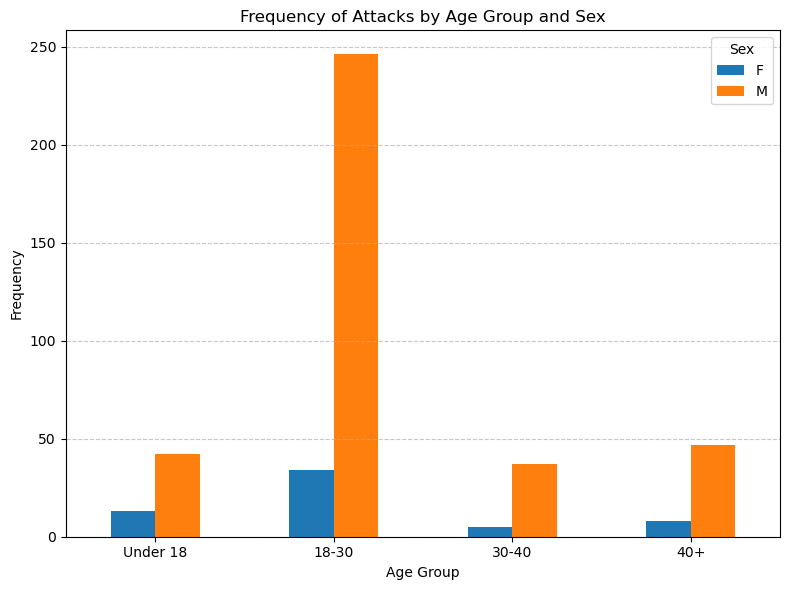

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age groups based on the Age column in your existing df
bins = [0, 17, 30, 40, 120]
labels = ['Under 18', '18-30', '30-40', '40+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Count the frequency of each Sex in each Age Group
freq_df = df.groupby(['Age Group', 'Sex']).size().unstack(fill_value=0)

# Plot the result
freq_df.plot(kind='bar', figsize=(8, 6))

plt.title('Frequency of Attacks by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
